In [6]:
from collections import Counter, defaultdict
import os, sys

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pprint import pprint
from pycocotools.coco import COCO
import skimage.io as io

In [9]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
sys.path.append('../dataset/')
import coco_api_helper
import coco_dataset

loading annotations into memory...
Done (t=10.89s)
creating index...
index created!
loading annotations into memory...
Done (t=4.65s)
creating index...
index created!
loading annotations into memory...
Done (t=0.12s)
creating index...
index created!


### Global Variables

In [11]:
coco_objects = coco_api_helper.coco_objects
coco_objects

{'train': <pycocotools.coco.COCO at 0x1172cc2e0>,
 'valid': <pycocotools.coco.COCO at 0x103e0e6d0>,
 'test': <pycocotools.coco.COCO at 0x103e0eaf0>}

### Category Observations
- the same super categories and categories exist across all datasets
- need to confirm if the same number of images per annotation can be found across all splits (train, validation, and test)  

In [12]:
coco = coco_api_helper.coco_objects.get('train')
categories = coco.loadCats(coco.getCatIds())

In [13]:
subcategories = [cat['name'] for cat in categories]

In [14]:
categories_consol = defaultdict(dict)

for category_meta in categories:
    categories_consol[category_meta['supercategory']].update({ category_meta['name']: category_meta['id']})

In [15]:
for supercat, subcat_ids in categories_consol.items():
    print(supercat, len(subcat_ids))

person 1
vehicle 8
outdoor 5
animal 10
accessory 5
sports 10
kitchen 7
food 10
furniture 6
electronic 6
appliance 5
indoor 7


In [18]:
categories_consol['animal'].keys()

dict_keys(['bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe'])

In [19]:
imgs_per_category = {}

for super_cat, subcat_name_ids in categories_consol.items():
    imgs_per_category[super_cat] = dict()
    for subcat, cat_id in subcat_name_ids.items():
        img_ids = coco.getImgIds(catIds=coco.getCatIds(cat_id))
        num_imgs=len(img_ids)
        imgs_per_category[super_cat][subcat] = dict(
            img_ids=img_ids,
            num_imgs=num_imgs
        )
        print(subcat, num_imgs)

person 82783
bicycle 82783
car 82783
motorcycle 82783
airplane 82783
bus 82783
train 82783
truck 82783
boat 82783
traffic light 82783
fire hydrant 82783
stop sign 82783
parking meter 82783
bench 82783
bird 82783
cat 82783
dog 82783
horse 82783
sheep 82783
cow 82783
elephant 82783
bear 82783
zebra 82783
giraffe 82783
backpack 82783
umbrella 82783
handbag 82783
tie 82783
suitcase 82783
frisbee 82783
skis 82783
snowboard 82783
sports ball 82783
kite 82783
baseball bat 82783
baseball glove 82783
skateboard 82783
surfboard 82783
tennis racket 82783
bottle 82783
wine glass 82783
cup 82783
fork 82783
knife 82783
spoon 82783
bowl 82783
banana 82783
apple 82783
sandwich 82783
orange 82783
broccoli 82783
carrot 82783
hot dog 82783
pizza 82783
donut 82783
cake 82783
chair 82783
couch 82783
potted plant 82783
bed 82783
dining table 82783
toilet 82783
tv 82783
laptop 82783
mouse 82783
remote 82783
keyboard 82783
cell phone 82783
microwave 82783
oven 82783
toaster 82783
sink 82783
refrigerator 82783

### Get Images with Intersecting Labels 

In [20]:
random_subcats = np.random.choice(subcategories, 2)
print(random_subcats)

fetch_these_cat_ids = coco.getCatIds(catNms=random_subcats.tolist())
fetch_these_img_ids = coco.getImgIds(catIds=fetch_these_cat_ids)[:9]
print(fetch_these_img_ids)

['horse' 'skis']
[544483, 81605, 569706, 305647, 457011, 327418, 521981]


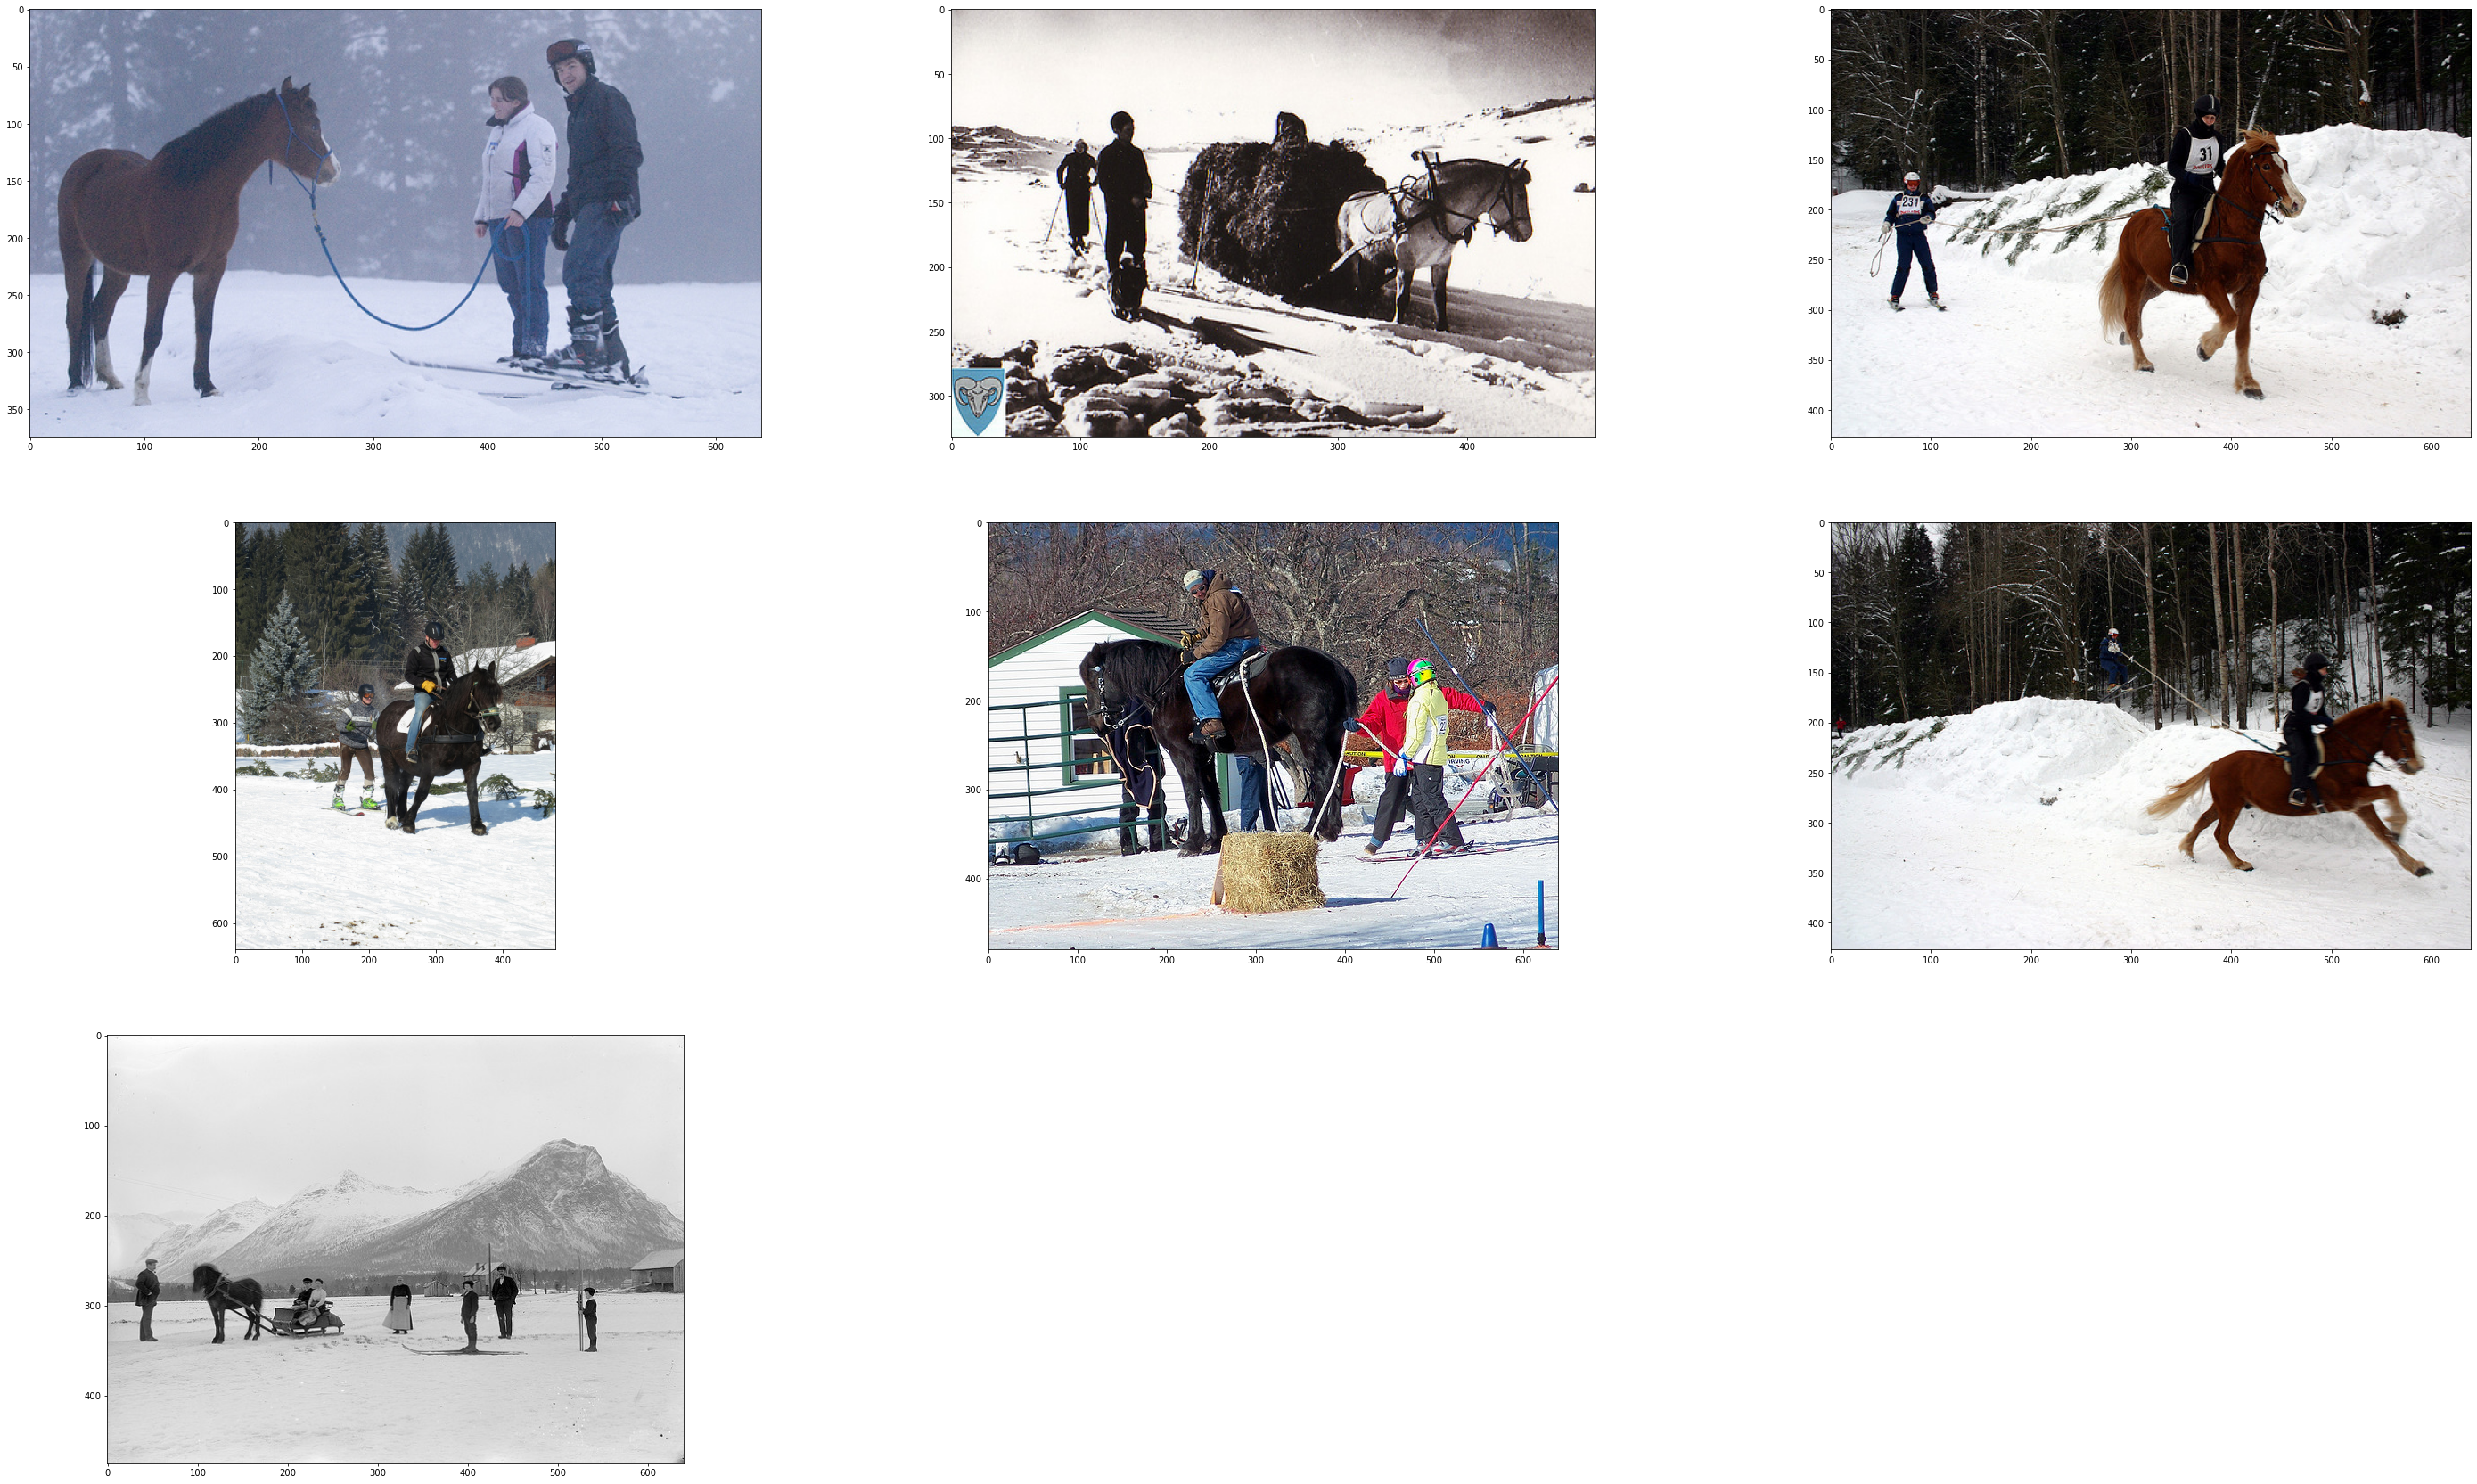

In [21]:
fig = plt.figure(1, figsize=(50, 30))
for i, img in enumerate(fetch_these_img_ids):
    fig.add_subplot(3, 3, i+1)
    img = coco.loadImgs(img)[0]
    I = io.imread(img['coco_url'])
    
    plt.imshow(I)
plt.show()

### Data Preparation for Training

In [45]:
# All the images are numpy arrays, and varying shapes
np_imgs = {}

for i, img in enumerate(fetch_these_img_ids):
    img_id = img
    img = io.imread(coco.loadImgs(img)[0]['coco_url'])
    np_imgs[img_id] = img
    print(img.shape, type(img))

(374, 640, 3) <class 'numpy.ndarray'>
(332, 500, 3) <class 'numpy.ndarray'>
(427, 640, 3) <class 'numpy.ndarray'>
(640, 480, 3) <class 'numpy.ndarray'>
(480, 640, 3) <class 'numpy.ndarray'>
(427, 640, 3) <class 'numpy.ndarray'>
(475, 640, 3) <class 'numpy.ndarray'>


In [50]:
resized_n_normed = {}

for id, np_img in np_imgs.items():
    resized = coco_dataset.resize_and_pad_img(np_img) 
    normed = coco_dataset.normalize_img(resized)
    resized_n_normed[id] = normed
    print(normed.shape)

(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


In [54]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
%autoreload

In [61]:
{id: coco_dataset.img_to_tensor(rn) for id, rn in resized_n_normed.items()}

AttributeError: module 'albumentations.augmentations.transforms' has no attribute 'ToTensorV2'